1.Write a short problem statement. What are you asking of the dataset to solve? What
domain questions are you trying to answer? Also, please specify the source of the data.

Ans:
Problem Statement:Classify a patient as diabetic or not using diagnostic measurements

Source:Kaggle(National Institute of Diabetes and Digestive and Kidney Diseases)

Target column:Outcome


2.Describe your data. That entails detailing the exploration of the data, the features, the
feature types, and any possible missing data. If you have missing data, what are you
going to do? Also, you should perform an exploratory analysis (statistics, visualization,
etc.) to understand the data.

In [4]:
#setting the directory
import os as os
os.getcwd()
os.chdir('C:/Users/venu vardhan/Desktop/Brandeis Career/Brandeis Degree/MSBA Academics/Spring 2022/Analyzing big data 2')
#reading the dataset
import pandas as pd
data=pd.read_csv("diabetes.csv")
#exploring the dataset
list(data.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:
data.shape

(768, 9)

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#check if there are any duplicate rows in the dataset
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data[dups])

False
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [10]:
#exploring target variable
print('Total number of diabetic and non-diabetic people:')
print(data.Outcome.value_counts())

Total number of diabetic and non-diabetic people:
0    500
1    268
Name: Outcome, dtype: int64


In [11]:
#computing the percentage of missing values
data.shape[0]
data.isnull().sum()
#number of missing values is shown as 0 because the data has 0 but not NA values
#we should convert 0 to NA values in below columns
import numpy as np
data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]] = data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
#Finding the NA value %
data.isnull().sum()/ data.shape[0] * 100.00

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [12]:
#imputing the NA values in this columns with median values w.r.t target variable
data["Pregnancies"].fillna(data.groupby(["Outcome"])["Pregnancies"].transform("median"),inplace=True)
data["Glucose"].fillna(data.groupby(["Outcome"])["Glucose"].transform("median"),inplace=True)
data["BloodPressure"].fillna(data.groupby(["Outcome"])["BloodPressure"].transform("median"),inplace=True)
data["SkinThickness"].fillna(data.groupby(["Outcome"])["SkinThickness"].transform("median"),inplace=True)
data["Insulin"].fillna(data.groupby(["Outcome"])["Insulin"].transform("median"),inplace=True)
data["BMI"].fillna(data.groupby(["Outcome"])["BMI"].transform("median"),inplace=True)

data.isnull().sum()
#succesfully imputed the values with median

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.377604,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.010736,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

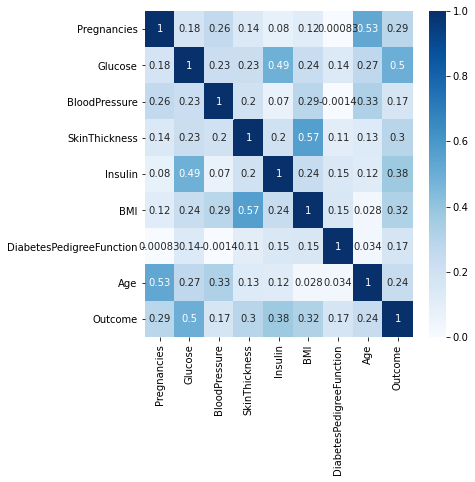

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

The correlation shows us a few interesting relationships
Age and Glucose have a high degree of correlation which is expected as people get older their blood glucose is expected to go up, we can see that glucose and insulin are also corelated however their relationship is complicated as when blood glucose goes up so does insulin however once insulin enters your blood glucose should stabilize this behavior, we can see in the table above where the blood glucose has a floor of 44 and ceiling of 199.  


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

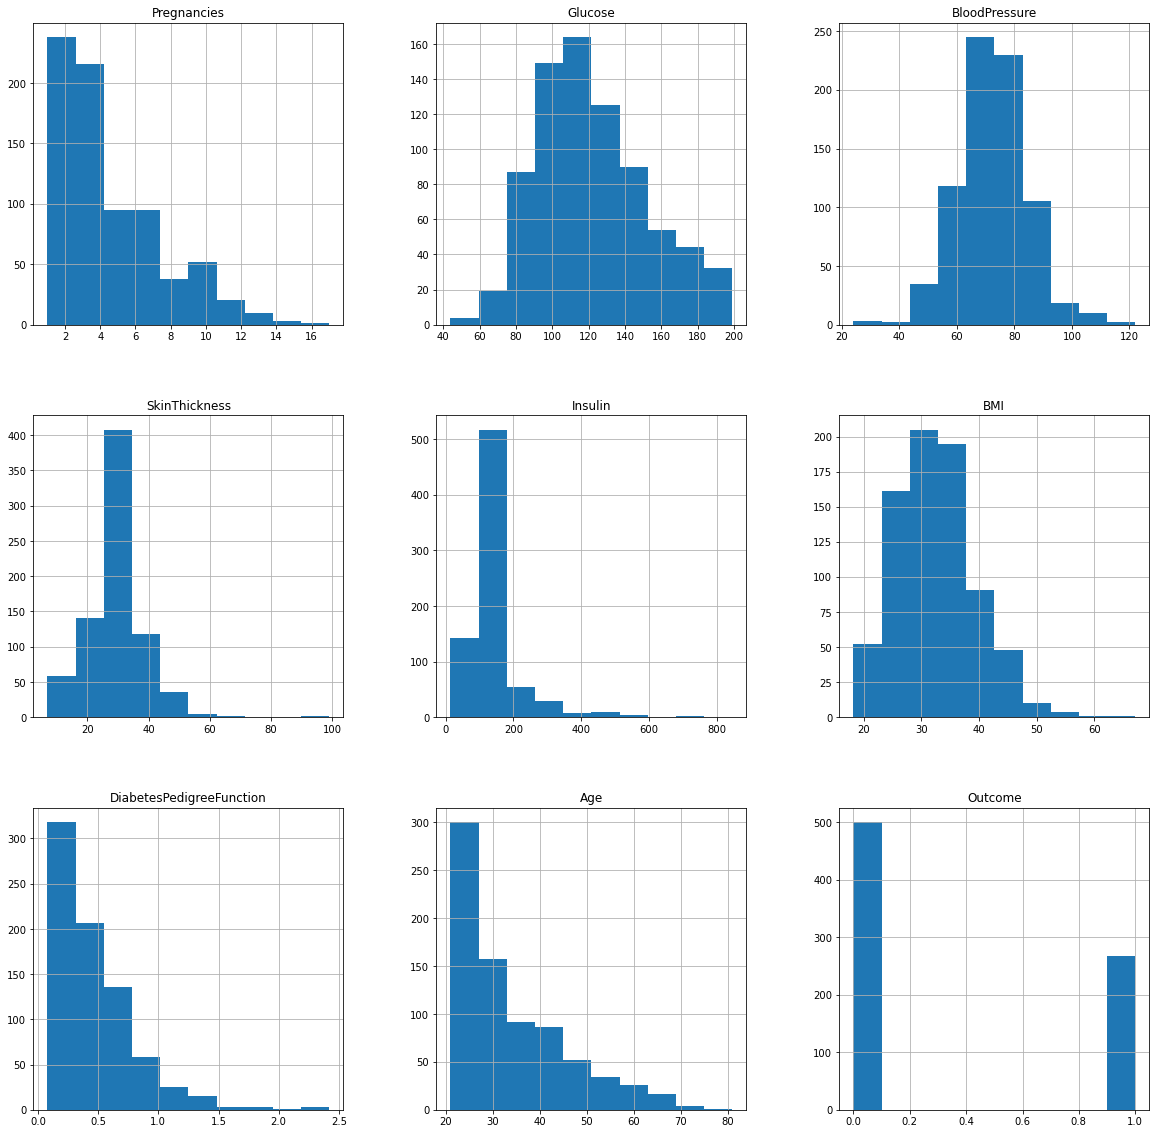

In [15]:
#exploring the distribution of various variables
data.hist(figsize = (20,20))

Age has a right-hand side long tale graph which means that the data is highly skewed towards the younger population, this from an analysis perspective is problematic as most diabatic issues have a late onset and our data may not represent the population.
BMI has a normal shape with right side short tale: 
Blood Pressure has a normal distribution curve
Pedigree Function has a right-hand side long tale graph which but the bulk of the data in present in the 0-.5, .5-1.
Glucose has a normal curve with a right-hand side dominating the area, this is due to biological constraints which make the distribution this way 
insulin has similar biological constraints which makes the data highly concentrated in the range 100-200
the outcome graph has the issue of polar data where in-between bins have 0 frequency



3.Determine any data reduction techniques that you use to better model your predictive analysis. You should consider any technique your deem appropriate, but put an
emphasis on principal components analysis (PCA), if you can.

In [16]:
#Data Preprocessing import
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# training and normalization of data
#segregating the target variable
X = data.iloc[:,:8]
Y = data.iloc[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=5)
#normalizing the data using standard scalar function 
Scalerfun = StandardScaler()
X_train = Scalerfun.fit_transform(X_train)
X_test = Scalerfun.fit_transform(X_test)



In [17]:
len(Y_pred)

NameError: name 'Y_pred' is not defined

In [18]:
#Models and metrics import
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

#models we will be building 
#Logistic regression
#KNN classifier
#Support vector Machines
#decision tree classifier
#Random forest classifier

#metrics we will use
#accuracy

In [19]:
#logistic Regression Model
logreg=LogisticRegression()

kfold = KFold(n_splits = 20, random_state = 123)
        
cv_results_lr = cross_val_score(logreg, X, Y, cv = 10, scoring= "accuracy")

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results_lr.mean(), cv_results_lr.std() * 2))
Y_pred = cross_val_predict(logreg, X, Y, cv = 10)
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))
cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [20]:
#KNN  Classifier Model
KNN=KNeighborsClassifier()

kfold = KFold(n_splits = 20, random_state = 123)
        
cv_results_knn = cross_val_score(KNN, X, Y, cv = 10, scoring= "accuracy")

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results_knn.mean(), cv_results_knn.std() * 2))
Y_pred = cross_val_predict(KNN, X, Y, cv = 10)
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))
cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [21]:
#SVM  Classifier Model
svc=SVC(kernel='linear', C=1)

kfold = KFold(n_splits = 20, random_state = 123)
        
cv_results_svc = cross_val_score(svc, X, Y, cv = 10, scoring= "accuracy")

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results_svc.mean(), cv_results_svc.std() * 2))
Y_pred = cross_val_predict(svc, X, Y, cv = 10)
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))
cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [22]:
#decision tree classifier
DT=DecisionTreeClassifier()

kfold = KFold(n_splits = 20, random_state = 123)
        
cv_results_DT = cross_val_score(DT, X, Y, cv = 10, scoring= "accuracy")

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results_DT.mean(), cv_results_DT.std() * 2))
Y_pred = cross_val_predict(DT, X, Y, cv = 10)
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))
cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [23]:
#Random forest classifier
RF=RandomForestClassifier()

kfold = KFold(n_splits = 20, random_state = 123)
        
cv_results_RF = cross_val_score(RF, X, Y, cv = 10, scoring= "accuracy")

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results_RF.mean(), cv_results_RF.std() * 2))
Y_pred = cross_val_predict(svc, X, Y, cv = 10)
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))
cnf_matrix = metrics.confusion_matrix(Y, Y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

We will select decision tree classifer which has high precision and high recall even though the accuracy is lower than random forest because we have to make sure the false negatives are low.

The model scores:

Accuracy: 0.86 (+/- 0.05)

Precision: 0.8089887640449438

Recall: 0.8059701492537313